In [ ]:
import numpy as np
import os
import random
import cv2
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model,to_categorical
 
from imutils import paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x_train=[]
y_train=[]
errorPath=[]
count=0
imagePaths = sorted(list(paths.list_images("/content/drive/My Drive/ProjectData/train")))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    try:
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (96, 96))
        image = img_to_array(image)
        x_train.append(image)
    
        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        y_train.append(label)
  
    except:
        count += 1
        errorPath.append(imagePath)

# scale the raw pixel intensities to the range [0, 1]
x_train = np.array(x_train, dtype="float") / 255.0
y_train = np.array(y_train)


In [ ]:
x_test=[]
y_test=[]
errorPath=[]
count=0
imagePaths = sorted(list(paths.list_images("/content/drive/My Drive/ProjectData/validation")))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    try:
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (96, 96))
        image = img_to_array(image)
        x_test.append(image)
    
        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        y_test.append(label)
  
    except:
        count += 1
        errorPath.append(imagePath)

# scale the raw pixel intensities to the range [0, 1]
x_test = np.array(x_test, dtype="float") / 255.0
y_test = np.array(y_test)

In [ ]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (28891, 96, 96, 3)
<class 'numpy.ndarray'> (28891, 7)
<class 'numpy.ndarray'> (7070, 96, 96, 3)
<class 'numpy.ndarray'> (7070, 7)


In [ ]:
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
# Initialising the CNN
model = Sequential()
 
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())
 
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
 
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
 
model.add(Dense(7, activation='softmax'))
 
 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
BATCH_SIZE=512
TRAINING_SIZE = 28891
VALIDATION_SIZE = 7070
 
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
 
steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(steps_per_epoch)
print(val_steps)

In [ ]:
history = model.fit(x_train,y_train,
                 epochs = 10,steps_per_epoch=steps_per_epoch,
                 validation_steps=val_steps,
                 validation_split = 0.2)

Epoch 1/10
57/57 [==============================] - 17s 298ms/step - loss: 1.8126 - accuracy: 0.3118 - val_loss: 1.8534 - val_accuracy: 0.2628
Epoch 2/10
57/57 [==============================] - 14s 254ms/step - loss: 1.5136 - accuracy: 0.4193 - val_loss: 1.9872 - val_accuracy: 0.2518
Epoch 3/10
57/57 [==============================] - 14s 253ms/step - loss: 1.3333 - accuracy: 0.4868 - val_loss: 2.0434 - val_accuracy: 0.1807
Epoch 4/10
57/57 [==============================] - 14s 253ms/step - loss: 1.1988 - accuracy: 0.5420 - val_loss: 1.7572 - val_accuracy: 0.3392
Epoch 5/10
57/57 [==============================] - 14s 253ms/step - loss: 1.0936 - accuracy: 0.5910 - val_loss: 1.6333 - val_accuracy: 0.3871
Epoch 6/10
57/57 [==============================] - 14s 253ms/step - loss: 0.9855 - accuracy: 0.6318 - val_loss: 1.6775 - val_accuracy: 0.3696
Epoch 7/10
57/57 [==============================] - 14s 253ms/step - loss: 0.8997 - accuracy: 0.6650 - val_loss: 1.5775 - val_accuracy: 0.4269

In [ ]:
model.evaluate(x_test, y_test)[1]

221/221 [==============================] - 2s 9ms/step - loss: 1.6059 - accuracy: 0.4636


0.4636492133140564

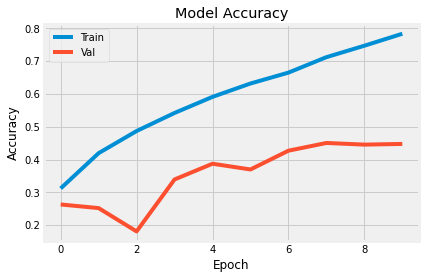

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

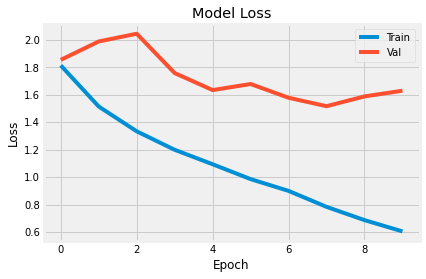

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
steps_per_epoch*10

570

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 189cde451cea4ac134a5808ff873e39e.jpg to 189cde451cea4ac134a5808ff873e39e (1).jpg


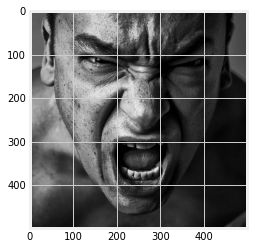

In [ ]:
new_image = plt.imread('189cde451cea4ac134a5808ff873e39e.jpg')
img = plt.imshow(new_image)

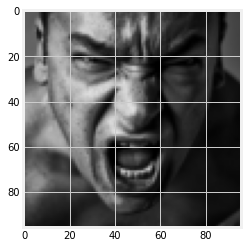

In [ ]:
#resize the image
from skimage.transform import resize
resized_image = resize(new_image, (96,96,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array([resized_image]))
#sSHow the predictions
predictions

array([[9.7873360e-01, 7.8716944e-04, 1.4056881e-02, 8.4507989e-04,
        1.9833460e-03, 3.3878247e-04, 3.2551088e-03]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6]
x = predictions

for i in range(7):
  for j in range(7):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[0, 2, 6, 4, 3, 1, 5]


In [ ]:
for i in range(5):
  print(lb.classes_[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

angry : 97.87 %
fear : 1.41 %
surprise : 0.33 %
neutral : 0.2 %
happy : 0.08 %
